In [16]:
import sys
import os
import time
import random
import json
from datetime import timezone, datetime
import string
import uuid
from uuid import UUID
import pandas as pd
import seaborn as sns
#%pylab inline

In [22]:
def random_generator(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for x in range(size))

from cassandra.cluster import Cluster
cluster = Cluster()

cluster = Cluster()
connection=cluster.connect('perf')

#session = cluster.connect()
read_readings={}

In [29]:
total_docs=0
j=0
itr=0
MAX_ITR=10
startf = datetime.now();
#user_lookup_stmt = session.prepare("select * from perf.cassandra_test1 where vmid=? ALLOW FILTERING")
#user_lookup_stmt = session.prepare("select * from perf.cassandra_test1")
while itr<MAX_ITR: 
    start = datetime.now();
    for index in range(100000000000):
        
        try:
            
            vmid1="vm"+random_generator(2,'1234')
            
            #res = session.execute(user_lookup_stmt, [vmid1])
            #res = session.execute(user_lookup_stmt)
            res = connection.execute("select * from cassandra_test where vmid='vm17' ALLOW FILTERING")
            timec=int((datetime.now() - start).total_seconds())

            if timec==1:
                #print (timec, 'secs for',index)
                j=j+1
                itr=itr+1
                read_readings[j]=index
                total_docs=total_docs + index
                break
                   
        except:
            print ('Unexpected error:', sys.exc_info()[0], ', for index ', index)
            raise
            
print ('Read',total_docs, ' in ', (datetime.now() - startf).total_seconds(), 's')
print ('average read per second is :',total_docs/10)

Read 4206  in  10.045724 s
average read per second is : 420.6


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f24d00682e8>],
      dtype=object)

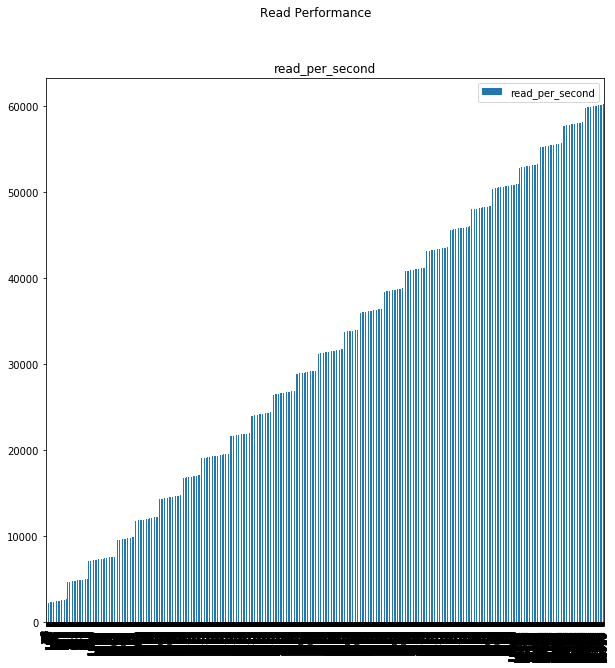

In [30]:
producer_df = pd.DataFrame.from_dict(read_readings, orient='index').rename(columns={0: 'read_per_second'})
producer_df.sort_index(inplace=True)
producer_df
producer_df.plot(kind='bar', subplots=True, figsize=(10, 10), title="Read Performance")